In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore") #Ignore certain system-wide alerts

In [2]:
df = pd.read_csv('../data/input/Telecom_customer churn.csv')
print('データ数は{}、変数は{}種類です'.format(df.shape[0], df.shape[1]))

データ数は100000、変数は100種類です


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [74]:
df.head(10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,months_bins,totmrc_Mean_bins,days,days-eqpdays
30,24.4900,41.75,16.99,0.0000,9.50,9.0425,8.7500,0.2925,0.000,81.25,...,U,U,U,N,776.0,1000031,"[54, 60)","(10.0, 18.52]",1740,964.0
31,30.0000,94.00,30.00,0.0000,0.00,0.0000,0.0000,0.0000,0.000,-54.00,...,U,U,U,Y,1395.0,1000032,"[54, 60)","(29.99, 30.0]",1620,225.0
32,35.5525,138.75,34.99,0.2475,0.00,0.0000,0.0000,0.0000,0.000,-10.75,...,Y,U,U,Y,628.0,1000033,"[48, 54)","(32.49, 37.408]",1560,932.0
33,21.1500,45.50,16.99,0.0000,14.00,4.1600,3.7700,0.3900,0.000,-15.50,...,U,U,U,Y,138.0,1000034,"[54, 60)","(10.0, 18.52]",1740,1602.0
34,28.5000,65.75,30.00,0.0000,0.00,0.0000,0.0000,0.0000,0.000,41.25,...,U,U,Y,Y,917.0,1000035,"[54, 60)","(29.99, 30.0]",1680,763.0
35,99.9125,1193.75,75.00,0.4950,97.25,24.3125,24.3125,0.0000,0.000,-13.75,...,U,U,U,Y,258.0,1000036,"[54, 60)","(74.99, 84.99]",1620,1362.0
36,30.0000,155.75,30.00,0.0000,0.00,0.0000,0.0000,0.0000,0.000,94.25,...,Y,U,U,Y,630.0,1000037,"[54, 60)","(29.99, 30.0]",1680,1050.0
37,22.3675,90.75,16.99,0.0000,0.75,0.3375,0.3375,0.0000,0.000,26.25,...,U,U,U,Y,1570.0,1000038,"[48, 54)","(10.0, 18.52]",1560,10.0
38,33.5625,197.50,30.00,0.2475,8.50,3.3150,0.0000,3.3150,0.000,123.50,...,U,U,U,Y,786.0,1000039,"[54, 60)","(29.99, 30.0]",1740,954.0
39,33.4775,195.50,29.99,0.0000,0.25,0.0975,0.0000,0.0975,2.565,54.50,...,U,Y,U,Y,179.0,1000040,"[54, 60)","(18.52, 29.99]",1620,1441.0


### カテゴリカル変数の可視化

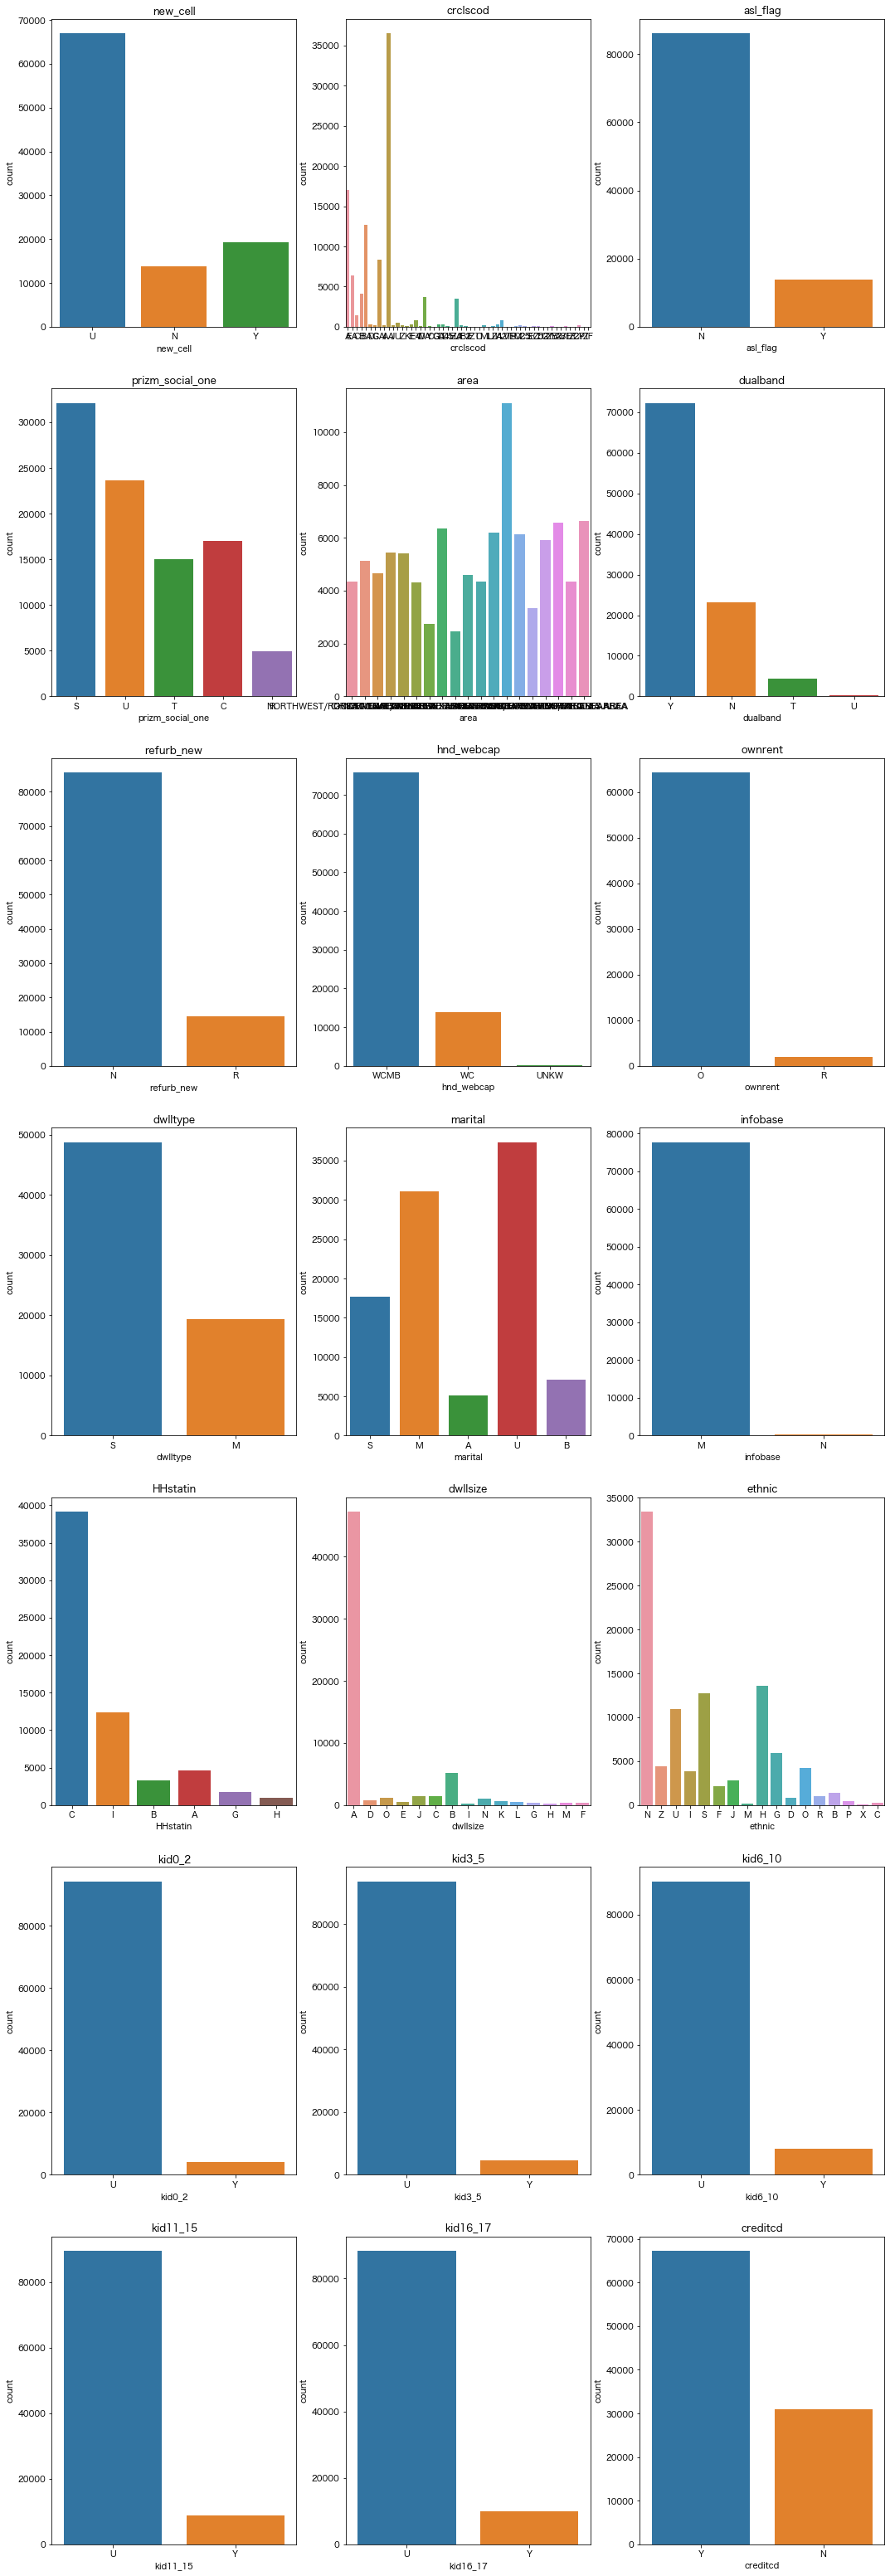

In [5]:
obj_col = df.columns[df.dtypes.values == "object"]
f,ax=plt.subplots(7,3,figsize=(18,56))
for i in range(21):
  nrow = i//3
  ncol = i%3
  sns.countplot(obj_col[i], data=df, ax=ax[nrow, ncol])
  ax[nrow, ncol].set_title(obj_col[i])
plt.show()

### 欠損値の確認

In [10]:
# Features with missing values
miss = df.isnull().sum().sort_values(ascending = False).head(44)
miss_per = (miss/len(df))*100

# Percentage of missing values
pd.DataFrame({'No. missing values': miss, '% of missing data': miss_per.values})

,No. missing values,% of missing data
numbcars,49366,49.366
dwllsize,38308,38.308
HHstatin,37923,37.923
ownrent,33706,33.706
dwlltype,31909,31.909
lor,30190,30.190
income,25436,25.436
adults,23019,23.019
infobase,22079,22.079
hnd_webcap,10189,10.189


In [11]:
max_size = 0
count = 0
churn_count = 0
for i in range(10000):
    null_size = df.iloc[i].isnull().sum()
    if null_size > max_size:
        max_size = null_size
    if null_size >= 10:
        count += 1
        churn_count += df.iloc[i]['churn']
print('値が欠損しているカラム数の最大値:', max_size)
print('欠損カラムが10個以上あるデータ数:', count)
print('欠損カラムが10個以上あるデータのchurn=1の割合:', churn_count / count)

値が欠損しているカラム数の最大値: 22
欠損カラムが10個以上あるデータ数: 537
欠損カラムが10個以上あるデータのchurn=1の割合: 0.5828677839851024


元データのchurn=1の割合が0.496（下記参照）なので、0.583は高いと言える。  
データがきちんと取れていないレコードが多数ある。

### 目的変数（churn）のデータ分析

num of pepole who stay: 50326
num of pepole who churn: 49317


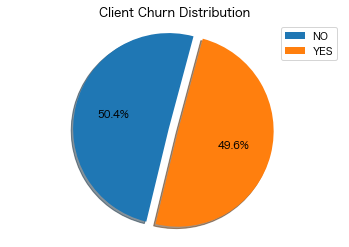

In [12]:
stay = df[(df['churn'] ==0) ].count()[1]
churn = df[(df['churn'] ==1) ].count()[1]
print ("num of pepole who stay: "+ str(stay))
print ("num of pepole who churn: "+ str(churn))

# ratio of those who churn and those who don't
sizes = [48401,47647]
labels='NO','YES'
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode,autopct='%1.1f%%',shadow=True, startangle=75 )
ax1.axis('equal') 
ax1.set_title("Client Churn Distribution")

ax1.legend(labels)

plt.show()

ほぼ、1:1の割合であり、均衡データであることがわかる。

In [9]:
fig1.savefig('../images/target.png')

### ベースラインモデル
まず、LightGBMで、どのような特徴量がchurnの予測に重要であるかを調べることにする。

In [4]:
def columns_categories(data_set):
    object_columns = []
    float_columns = []
    int_columns = []
    other_columns = []
    n,m,s=0,0,0
    for i in data_set.columns.values:
        if data_set[i].dtypes=='object':
            object_columns.append(i)
            n+=1
        if data_set[i].dtypes=='int':
            int_columns.append(i)
            m+=1
        if data_set[i].dtypes=='float':
            float_columns.append(i)
            s+=1
    print('object(',n,'):\n',object_columns)
    print('int(',m,'):\n',int_columns)
    print('float(',s,'):\n',float_columns)

In [5]:
columns_categories(df)

object( 21 ):
 ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area', 'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
int( 10 ):
 ['churn', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'adjqty', 'avg3mou', 'avg3qty', 'avg3rev', 'Customer_ID']
float( 69 ):
 ['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean', 'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean', 'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean', 'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean', 'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_

In [6]:
# カテゴリカル変数を抽出
obj_col = df.select_dtypes(include = 'object').columns
obj_col

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [8]:
# カテゴリカル変数のユニークな値の数を調べる
encoding_col=[]
for i in df.select_dtypes(include='object'):   
    print(i,'-->',df[i].nunique())
    encoding_col.append(i)

new_cell --> 3
crclscod --> 54
asl_flag --> 2
prizm_social_one --> 5
area --> 19
dualband --> 4
refurb_new --> 2
hnd_webcap --> 3
ownrent --> 2
dwlltype --> 2
marital --> 5
infobase --> 2
HHstatin --> 6
dwllsize --> 15
ethnic --> 17
kid0_2 --> 2
kid3_5 --> 2
kid6_10 --> 2
kid11_15 --> 2
kid16_17 --> 2
creditcd --> 2


In [14]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True, columns = encoding_col, prefix = encoding_col)
df2.drop("Customer_ID", axis=1, inplace=True)

In [15]:
df2.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0,0,0,0,0,0,0,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0,0,0,1,0,0,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0,0,0,0,0,1,0,0,0,1
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0,1,0,0,1,0,0,0,0,1
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
TARGET = "churn"
X = df2.drop(TARGET,axis=1) 
y = df2[TARGET] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [17]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14917
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 205
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's auc: 0.639201
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.63984
[3]	valid_0's auc: 0.641908
[4]	valid_0's auc: 0.641996
[5]	valid_0's auc: 0.642645
[6]	valid_0's auc: 0.642996
[7]	valid_0's auc: 0.642652
[8]	valid_0's auc: 0.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

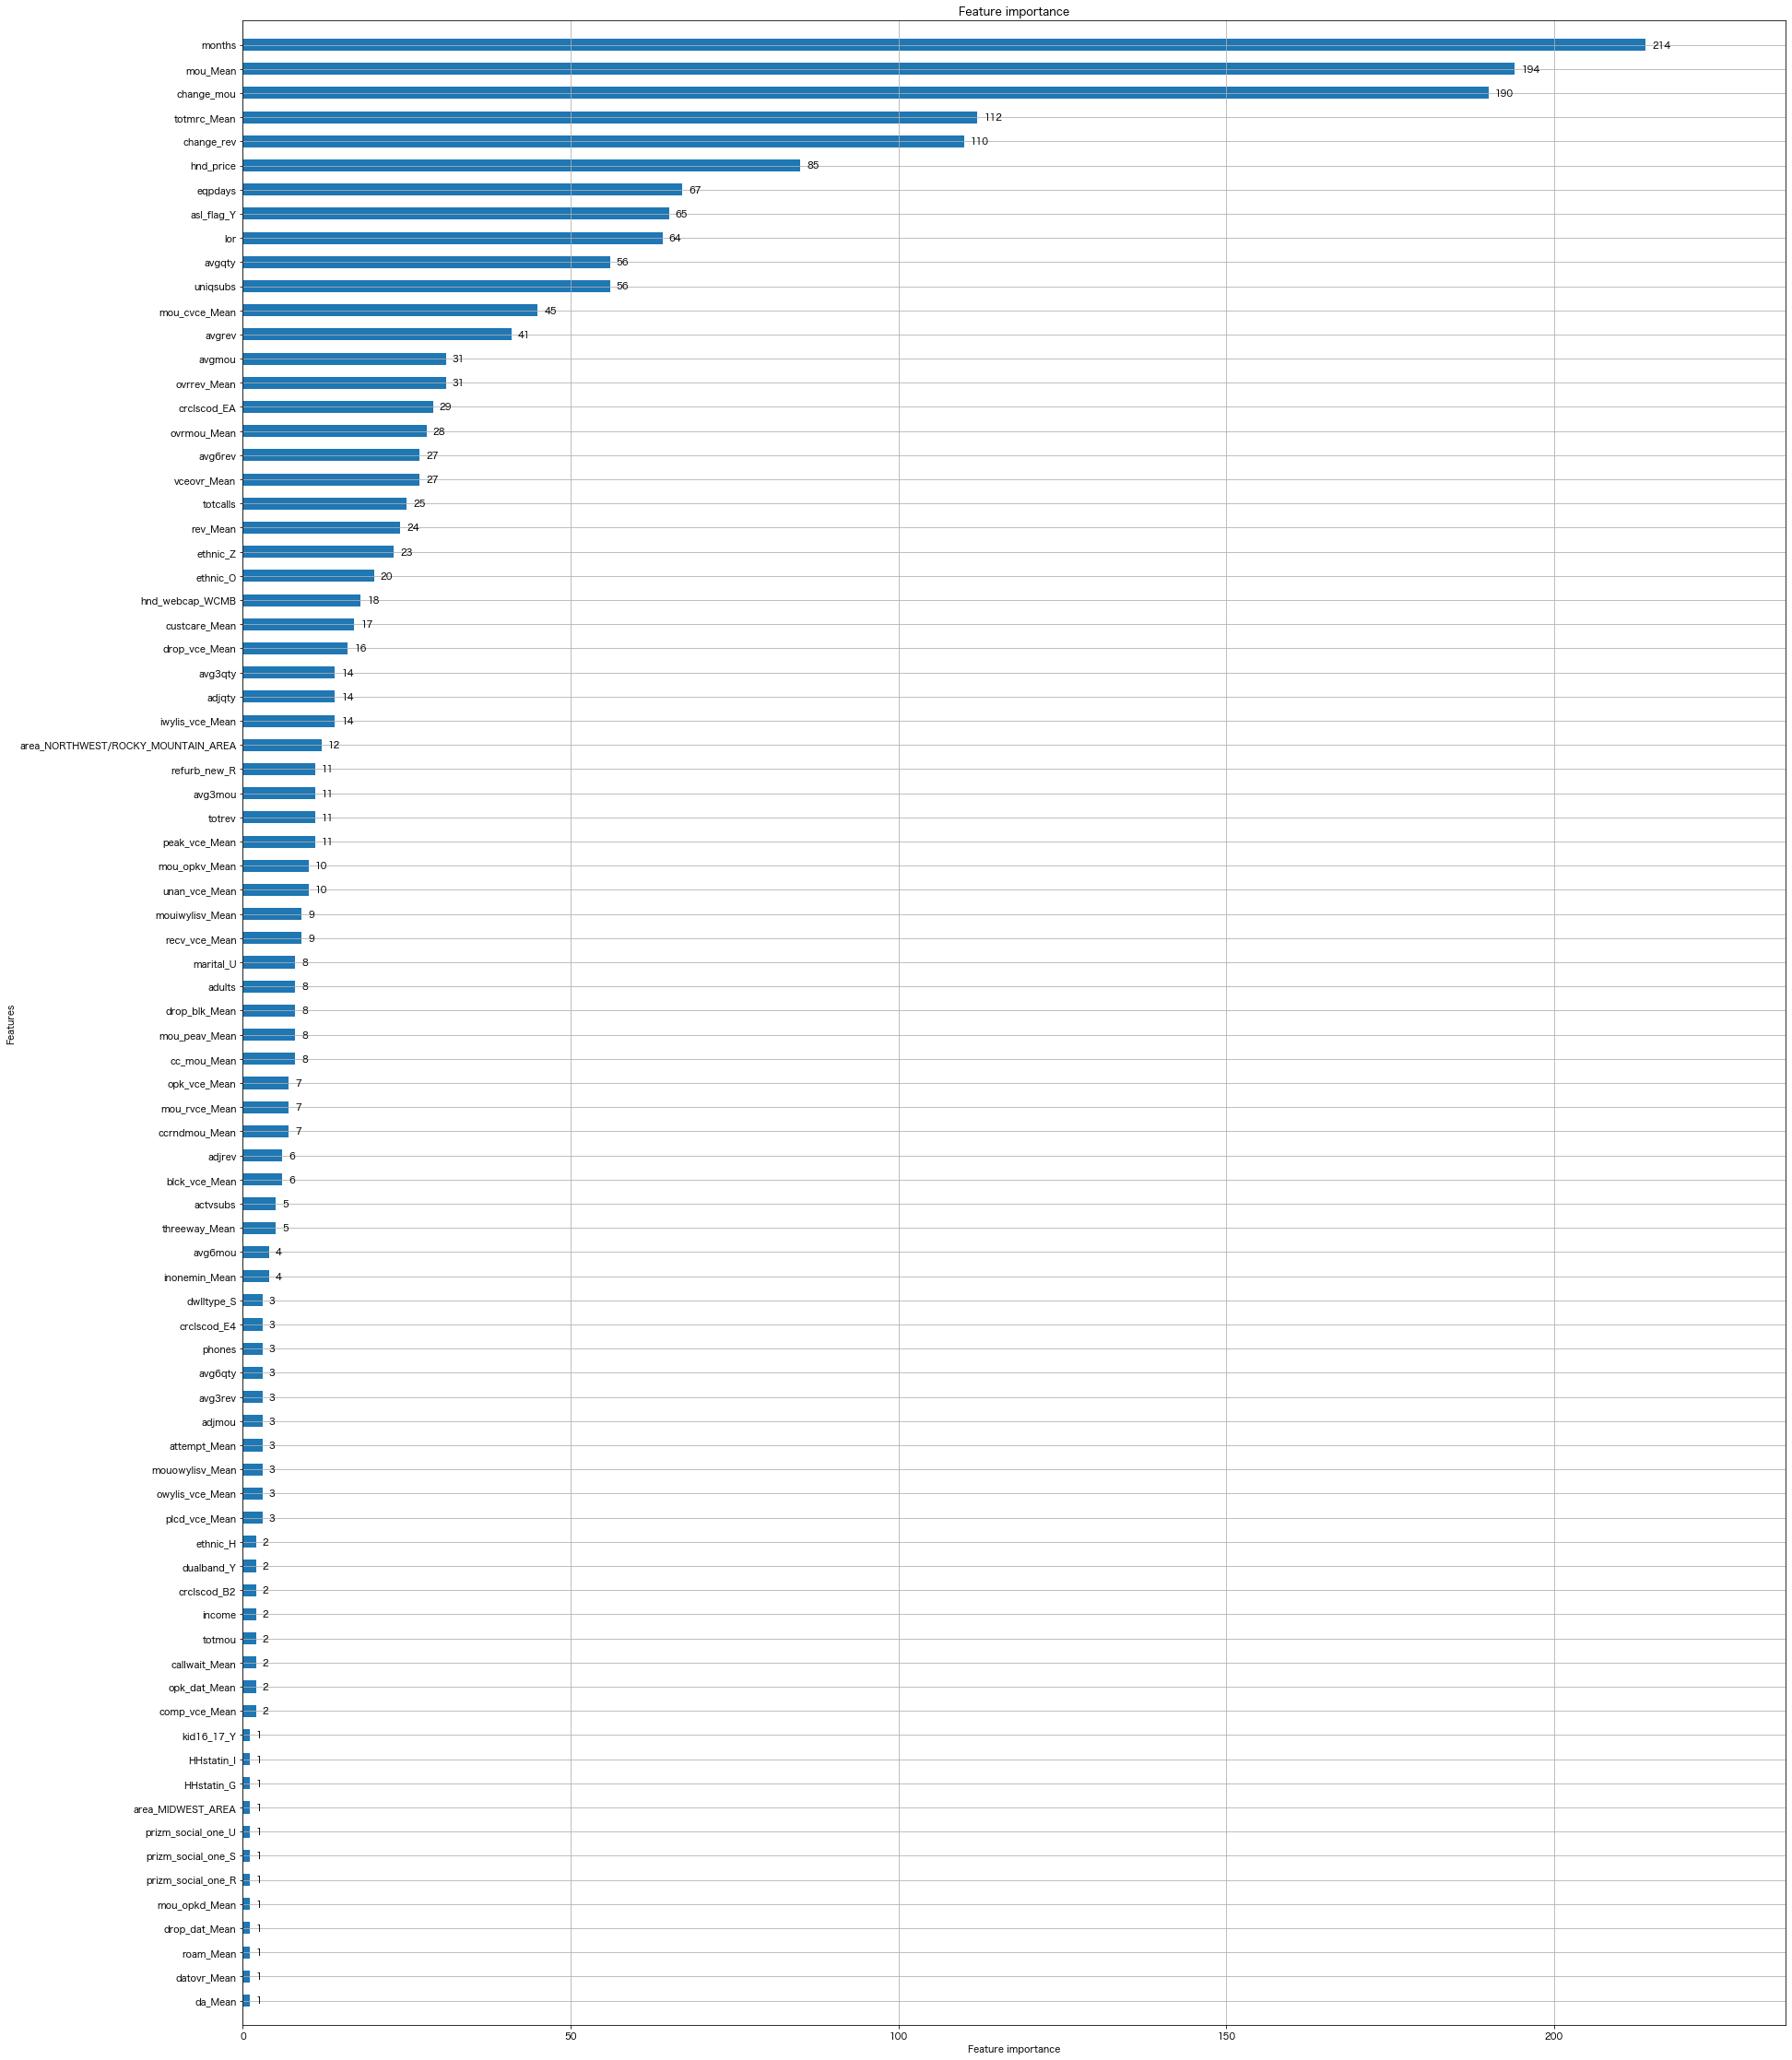

In [18]:
lgb.plot_importance(model, height=0.5, figsize=(30,40))

In [19]:
importances = pd.DataFrame(model.feature_importance(), index=X.columns, columns=['importance'])
importances.sort_values(by='importance', ascending=False).head(30)

,importance
months,214
mou_Mean,194
change_mou,190
totmrc_Mean,112
change_rev,110
hnd_price,85
eqpdays,67
asl_flag_Y,65
lor,64
avgqty,56


重要度の高い特徴量をいくつか検討してみる。

### 重要度の高い特徴量

In [20]:
def feature_describe(df, col):
    print('平均')
    display(df.groupby(['churn'])[col].mean())
    print('------------------------------')
    print('中央値')
    display(df.groupby(['churn'])[col].median())
    print('------------------------------')
    print('欠損値の数：', df[col].isnull().sum())
    print('------------------------------')
    print('統計量')
    display(df[col].describe())
    print('------------------------------')

#### months（サービス利用開始からの総月数）

In [21]:
feature_describe(df, 'months')

平均


churn
0    18.633074
1    19.038457
Name: months, dtype: float64

------------------------------
中央値


churn
0    16
1    17
Name: months, dtype: int64

------------------------------
欠損値の数： 0
------------------------------
統計量


count    100000.000000
mean         18.833990
std           9.655794
min           6.000000
25%          11.000000
50%          16.000000
75%          24.000000
max          61.000000
Name: months, dtype: float64

------------------------------


<AxesSubplot:ylabel='Frequency'>

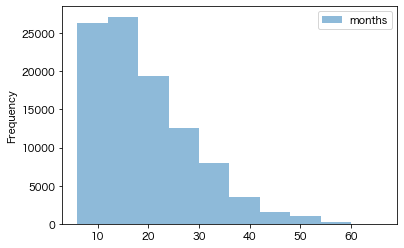

In [22]:
bins_list = [6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66]
df['months'].plot.hist(bins=bins_list, alpha=0.5, legend=True)

In [23]:
df['months_bins'] = pd.cut(df['months'], bins=bins_list, right=False)
df['months_bins'].value_counts(sort=False)

[6, 12)     26410
[12, 18)    27176
[18, 24)    19396
[24, 30)    12538
[30, 36)     8014
[36, 42)     3557
[42, 48)     1613
[48, 54)     1010
[54, 60)      274
[60, 66)       12
Name: months_bins, dtype: int64

解約率が全体でならすと、50%というのは高すぎるため、churn_rateが約50％となるように、ランダムサンプリングされたと仮定する。

このとき、年齢分布は母数分布の年齢分布とほぼ同じような形状と仮定できる。
その場合、このヒストグラムは契約が1年以上経過すると、解約件数が増え、どんどんと解約されていくように捉えることができる。

横軸をmonths、縦軸をchurn=1の割合の折れ線グラフを描いてみる

<AxesSubplot:xlabel='months'>

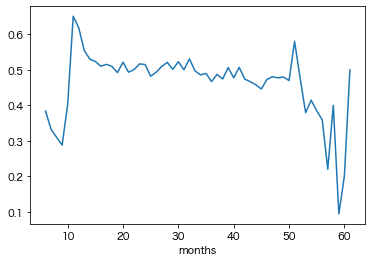

In [24]:
df.groupby('months')['churn'].mean().plot(kind='line')

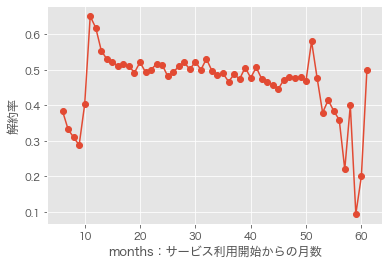

In [64]:
fig = plt.figure()
plt.style.use('ggplot')
plt.plot(df.groupby('months')['churn'].mean(), marker='o')
plt.xlabel('months：サービス利用開始からの月数')
plt.ylabel('解約率')
fig.savefig("../images/months.png")


契約11~12月で解約率が非常に高くなり、その後なだらかに下がっていく。

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: months, dtype: object

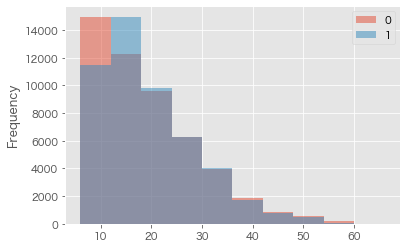

In [28]:
df.groupby('churn')['months'].plot.hist(bins=bins_list, alpha=0.5, legend=True)

解約率は契約11ヶ月〜12ヶ月で非常に高くなる傾向があるので、この時期に施策を打ち出すべき。

In [29]:
df.groupby('months')['churn'].value_counts(normalize=True, sort=False)

months  churn
6       0        0.616216
        1        0.383784
7       0        0.667403
        1        0.332597
8       0        0.690451
                   ...   
59      1        0.093750
60      0        0.800000
        1        0.200000
61      0        0.500000
        1        0.500000
Name: churn, Length: 112, dtype: float64

#### mou_Mean(平均月間使用時間)

In [30]:
feature_describe(df, 'mou_Mean')

平均


churn
0    543.206895
1    483.306417
Name: mou_Mean, dtype: float64

------------------------------
中央値


churn
0    380.50
1    329.75
Name: mou_Mean, dtype: float64

------------------------------
欠損値の数： 357
------------------------------
統計量


count    99643.000000
mean       513.559937
std        525.168140
min          0.000000
25%        150.750000
50%        355.500000
75%        703.000000
max      12206.750000
Name: mou_Mean, dtype: float64

------------------------------


* 月間使用時間が短い人ほど解約しやすい、ということがわかる。  
* 欠損値もある程度ある

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mou_Mean, dtype: object

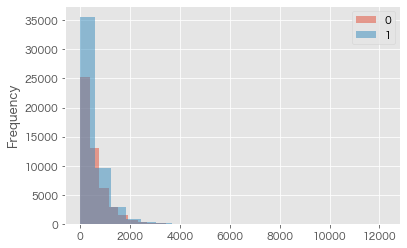

In [31]:
df.groupby(["churn"])["mou_Mean"].plot.hist(bins=20, alpha=0.5, legend=True)

#### change_mou(対前3ヶ月との月間使用時間の変化)

In [32]:
feature_describe(df, 'change_mou')

平均


churn
0    -5.344265
1   -22.759003
Name: change_mou, dtype: float64

------------------------------
中央値


churn
0    -3.0
1   -10.0
Name: change_mou, dtype: float64

------------------------------
欠損値の数： 891
------------------------------
統計量


count    99109.000000
mean       -13.933818
std        276.087509
min      -3875.000000
25%        -87.000000
50%         -6.250000
75%         63.000000
max      31219.250000
Name: change_mou, dtype: float64

------------------------------


* 欠損値が891もある。
* 全体的に利用時間は減っているが、特に解約する人はその傾向が強い

#### totmrc_Mean（課金額）

In [33]:
feature_describe(df, 'totmrc_Mean')

平均


churn
0    47.782378
1    44.543091
Name: totmrc_Mean, dtype: float64

------------------------------
中央値


churn
0    44.9900
1    43.4175
Name: totmrc_Mean, dtype: float64

------------------------------
欠損値の数： 357
------------------------------
統計量


count    99643.000000
mean        46.179136
std         23.623489
min        -26.915000
25%         30.000000
50%         44.990000
75%         59.990000
max        409.990000
Name: totmrc_Mean, dtype: float64

------------------------------


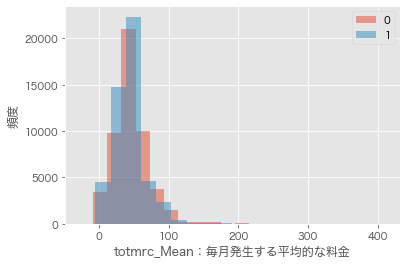

In [68]:
fig = plt.figure()
plt.style.use('ggplot')
df.groupby(["churn"])["totmrc_Mean"].plot.hist(bins=20, alpha=0.5, legend=True)
plt.xlabel('totmrc_Mean：毎月発生する平均的な料金')
plt.ylabel('頻度')
fig.savefig("../images/totmrc_Mean.png")

In [35]:
df['totmrc_Mean_bins'] = pd.qcut(df['totmrc_Mean'], 20, duplicates='drop')
df['totmrc_Mean_bins'].value_counts(sort=False)

(-26.916, 10.0]     7490
(10.0, 18.52]       2475
(18.52, 29.99]     12981
(29.99, 30.0]       5873
(30.0, 32.49]       2354
(32.49, 37.408]     3711
(37.408, 39.99]     8808
(39.99, 41.28]      1240
(41.28, 44.99]     13470
(44.99, 47.005]     1385
(47.005, 49.99]     6429
(49.99, 52.49]      3758
(52.49, 59.99]     11948
(59.99, 69.99]      6334
(69.99, 74.99]      1491
(74.99, 84.99]      5029
(84.99, 409.99]     4867
Name: totmrc_Mean_bins, dtype: int64

In [36]:
df.groupby('totmrc_Mean_bins')['churn'].value_counts(normalize=True, sort=False)

totmrc_Mean_bins  churn
(-26.916, 10.0]   0        0.451135
                  1        0.548865
(10.0, 18.52]     0        0.512727
                  1        0.487273
(18.52, 29.99]    0        0.433711
                  1        0.566289
(29.99, 30.0]     0        0.459731
                  1        0.540269
(30.0, 32.49]     0        0.461342
                  1        0.538658
(32.49, 37.408]   0        0.468068
                  1        0.531932
(37.408, 39.99]   0        0.502157
                  1        0.497843
(39.99, 41.28]    0        0.565323
                  1        0.434677
(41.28, 44.99]    0        0.549443
                  1        0.450557
(44.99, 47.005]   0        0.498195
                  1        0.501805
(47.005, 49.99]   0        0.520765
                  1        0.479235
(49.99, 52.49]    0        0.501330
                  1        0.498670
(52.49, 59.99]    0        0.509709
                  1        0.490291
(59.99, 69.99]    0        0.564414
    

In [37]:
df[df['totmrc_Mean'] > 37.408]['churn'].value_counts(normalize=True)

0    0.533131
1    0.466869
Name: churn, dtype: float64

In [38]:
from scipy import stats
# inverse of quantile
stats.percentileofscore(df['totmrc_Mean'], 37.408)

34.884

月間課金額が上位約1/3の顧客はchrun=1の割合が0.467と低い傾向が見られる

#### change_rev（利用料金の変化）

In [39]:
feature_describe(df, 'change_rev')

平均


churn
0   -1.410195
1   -0.621263
Name: change_rev, dtype: float64

------------------------------
中央値


churn
0   -0.2925
1   -0.3150
Name: change_rev, dtype: float64

------------------------------
欠損値の数： 891
------------------------------
統計量


count    99109.000000
mean        -1.021067
std         50.363209
min      -1107.740000
25%         -7.365000
50%         -0.315000
75%          1.642500
max       9963.657500
Name: change_rev, dtype: float64

------------------------------


<AxesSubplot:xlabel='change_rev', ylabel='Density'>

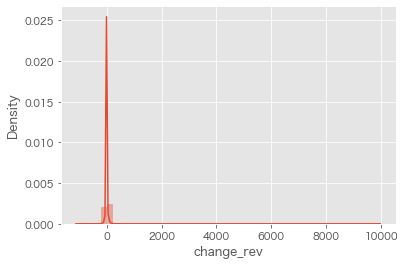

In [40]:
sns.distplot(df['change_rev'])

数値の幅が広すぎて、グラフが見づらいため、データの上下5%を外して可視化してみる。

In [41]:
df['change_rev'].sort_values()

47315   -1107.740
76358    -851.105
13041    -768.575
28626    -694.265
17142    -673.355
           ...   
99995         NaN
99996         NaN
99997         NaN
99998         NaN
99999         NaN
Name: change_rev, Length: 100000, dtype: float64

外れ値を除く

In [42]:
q_975 = df['change_rev'].quantile(0.975)
q_025 = df['change_rev'].quantile(0.025)
print('97.5%分位点:', q_975)
print('0.25%分位点:', q_025)

97.5%分位点: 78.45450000000005
0.25%分位点: -70.513


In [43]:
new_df = df[(df['change_rev'] < q_975) & (df['change_rev'] > q_025)][['change_rev', 'churn']]
new_df.head()

,change_rev,churn
0,-18.9975,1
1,50.9875,0
2,0.0000,1
3,0.0000,0
4,0.0000,0


<AxesSubplot:xlabel='change_rev', ylabel='Density'>

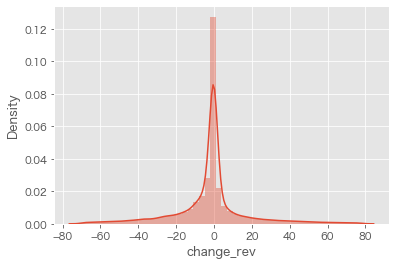

In [44]:
sns.distplot(new_df['change_rev'])

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: change_rev, dtype: object

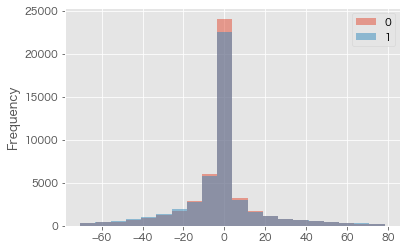

In [45]:
new_df.groupby(["churn"])["change_rev"].plot.hist(bins=20, alpha=0.5, legend=True)

#### hnd_price(現在の携帯料金)

In [46]:
feature_describe(df, 'hnd_price')

平均


churn
0    108.129344
1     95.539523
Name: hnd_price, dtype: float64

------------------------------
中央値


churn
0    129.98999
1     99.98999
Name: hnd_price, dtype: float64

------------------------------
欠損値の数： 847
------------------------------
統計量


count    99153.000000
mean       101.875763
std         61.005671
min          9.989998
25%         29.989990
50%         99.989990
75%        149.989990
max        499.989990
Name: hnd_price, dtype: float64

------------------------------


In [47]:
df[df['hnd_price'].isnull()]['churn'].value_counts()

0    536
1    311
Name: churn, dtype: int64

In [48]:
311/847

0.36717827626918537

* 解約者は解約しない人に対して明らかに現在の携帯料金が安価
* 携帯料金がわからない人の解約率は0.367と低い。
* 仮説：携帯料金がわからない＝他社から変更した人。他社から変更した人は携帯を変えにくい。

#### eqpdays（現在の機器の日数）

In [49]:
feature_describe(df, 'eqpdays')

平均


churn
0    363.280925
1    421.089524
Name: eqpdays, dtype: float64

------------------------------
中央値


churn
0    310.0
1    366.0
Name: eqpdays, dtype: float64

------------------------------
欠損値の数： 1
------------------------------
統計量


count    99999.000000
mean       391.932309
std        256.482193
min         -5.000000
25%        212.000000
50%        342.000000
75%        530.000000
max       1823.000000
Name: eqpdays, dtype: float64

------------------------------


* 欠損値はほとんどない。
* 解約者は現在の機器の日数が高い傾向にある。
* 仮説：機器の変更の際に解約する場合が多い

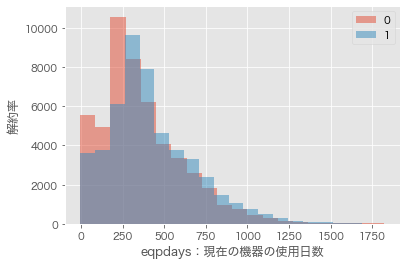

In [69]:
fig = plt.figure()
plt.style.use('ggplot')
df.groupby(["churn"])["eqpdays"].plot.hist(bins=20, alpha=0.5, legend=True)
plt.xlabel('eqpdays：現在の機器の使用日数')
plt.ylabel('解約率')
fig.savefig("../images/eqpdays.png")

In [50]:
df['days'] = df['months'] * 30
df[['days', 'eqpdays']].head(20)
df['days-eqpdays'] = abs(df['days'] - df['eqpdays'])

In [51]:
feature_describe(df, 'days-eqpdays')

平均


churn
0    200.057418
1    155.148804
Name: days-eqpdays, dtype: float64

------------------------------
中央値


churn
0    18.0
1    17.0
Name: days-eqpdays, dtype: float64

------------------------------
欠損値の数： 1
------------------------------
統計量


count    99999.000000
mean       177.799588
std        276.086766
min          0.000000
25%          7.000000
50%         17.000000
75%        289.000000
max       1760.000000
Name: days-eqpdays, dtype: float64

------------------------------


#### asl_flagY(アカウントの使用限度額)
asl_flagはYesかNoの２択。

In [ ]:
df.groupby('asl_flag')['churn'].value_counts()

In [ ]:
print('asl_flg = No の解約率:', 43858 / (42206 + 43858))
print('asl_flg = Yes の解約率:', 5704 / (8232 + 5704))

* アカウントの使用限度額がある人の方が、解約率が低い

#### lor（居住年数）

In [ ]:
feature_describe(df, 'lor')

居住年数が長いほど比較的契約率が少ない

In [ ]:
df[df['lor'].isnull()]['churn'].value_counts()

In [ ]:
df[df['lor'].notnull()]['churn'].value_counts()

このデータが欠損しているかどうかは解約率がそこまで影響してなさそう。

#### avgqty（顧客生涯の平均月間通話回数）

In [ ]:
feature_describe(df, 'avgqty')

In [ ]:
df.groupby(["churn"])["avgqty"].plot.hist(bins=20, alpha=0.5, legend=True)

非常に通話回数の多いデータがあるので、外れ値を外して見てみる。

In [ ]:
q_95 = df['avgqty'].quantile(0.95)
new_df2 = df[df['avgqty'] < q_95][['avgqty', 'churn']]
new_df2.head()

In [ ]:
new_df2.groupby(["churn"])["avgqty"].plot.hist(bins=20, alpha=0.5, legend=True)


#### uniqsubs（世帯内の契約数）

In [52]:
feature_describe(df, 'uniqsubs')

平均


churn
0    1.505631
1    1.591401
Name: uniqsubs, dtype: float64

------------------------------
中央値


churn
0    1
1    1
Name: uniqsubs, dtype: int64

------------------------------
欠損値の数： 0
------------------------------
統計量


count    100000.000000
mean          1.548140
std           1.075255
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         196.000000
Name: uniqsubs, dtype: float64

------------------------------


In [53]:
df['uniqsubs'].value_counts(ascending=False).head(10)

1     61966
2     27556
3      6579
4      2556
5       835
6       315
7       111
8        40
9        20
10        9
Name: uniqsubs, dtype: int64

In [54]:
df['uniqsubs'].sort_values(ascending=False).head(15)

45772    196
38762     18
32531     13
77452     13
85417     12
68786     12
10717     12
95128     12
13716     11
58560     11
82831     11
78698     11
40330     11
35493     10
86268     10
Name: uniqsubs, dtype: int64

In [55]:
df['uniqsubs'].isnull().sum()

0

In [56]:
df[df['uniqsubs'] >= 5]['churn'].value_counts()

1    753
0    590
Name: churn, dtype: int64

In [57]:
753 / (753 + 590)

0.5606850335070737

churn
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: uniqsubs, dtype: object

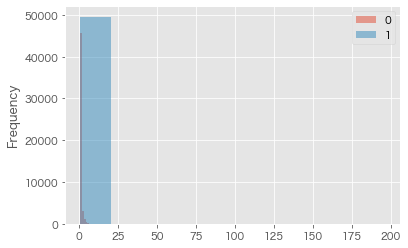

In [61]:
df.groupby('churn')['uniqsubs'].plot.hist(alpha=0.5, legend=True)

* 世帯内の契約数が多い顧客は解約率が高めな傾向がある。
* 欠損値はない。

### 特徴量エンジニアリング&モデリング

In [9]:
df3 = df.copy()
df3 = pd.get_dummies(df3, drop_first=True, columns = encoding_col, prefix = encoding_col)
df3.drop("Customer_ID", axis=1, inplace=True)

In [10]:
df3['dif_rev_totmrc'] = df3['rev_Mean'] - df3['totmrc_Mean']

df3['vce_blk_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = df3['blck_vce_Mean'] / df3['plcd_vce_Mean']

df3['vce_drp_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_drp_rate'] = df3['drop_vce_Mean'] / df3['plcd_vce_Mean']

df3['dat_blk_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_blk_rate'] = df3['blck_dat_Mean'] / df3['plcd_dat_Mean']

df3['dat_drp_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_drp_rate'] = df3['drop_dat_Mean'] / df3['plcd_dat_Mean']

df3['vce_cmpt_rate'] = 0
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_cmpt_rate'] = df3['comp_vce_Mean'] / df3['plcd_vce_Mean']

df3['dat_cmpt_rate'] = 0
df3.loc[ df3['plcd_dat_Mean'] > 0, 'dat_cmpt_rate'] = df3['comp_dat_Mean'] / df3['plcd_dat_Mean']

df3['tot_cmpt_rate'] = 0
df3.loc[ df3['attempt_Mean'] > 0, 'tot_cmpt_rate'] = df3['complete_Mean'] / df3['attempt_Mean']

df3['tot_drp_blk_rate'] = 0
df3.loc[ df3['attempt_Mean'] > 0, 'tot_drp_blk_rate'] = df3['drop_blk_Mean'] / df3['attempt_Mean']

df3['vce_dat_ratio'] = 0
df3.loc[ (df3['plcd_vce_Mean'] + df3['plcd_dat_Mean']) > 0, 'tot_drp_blk_rate'] = df3['plcd_vce_Mean'] /  (df3['plcd_vce_Mean'] + df3['plcd_dat_Mean'])

df3['diff_3mon_overall_mou'] = 0
df3.loc[ (df3['avgmou'] == df3['avgmou']) & (df3['avg3mou'] == df3['avg3mou']), 'diff_3mon_overall_mou'] = (df3['avg3mou'] - df3['avgmou']) / df3['avgmou']

df3['diff_3mon_overall_qty'] = 0
df3.loc[ (df3['avgqty'] == df3['avgqty']) & (df3['avg3qty'] == df3['avg3qty']), 'diff_3mon_overall_qty'] = (df3['avg3qty'] - df3['avgqty']) / df3['avgqty']

df3['diff_3mon_overall_rev'] = 0
df3.loc[ (df3['avgrev'] == df3['avgrev']) & (df3['avg3rev'] == df3['avg3rev']), 'diff_3mon_overall_rev'] = (df3['avg3rev'] - df3['avgrev']) / df3['avgrev']

df3['diff_6mon_overall_mou'] = 0
df3.loc[ (df3['avgmou'] == df3['avgmou']) & (df3['avg6mou'] == df3['avg6mou']), 'diff_6mon_overall_mou'] = (df3['avg6mou'] - df3['avgmou']) / df3['avgmou']

df3['diff_6mon_overall_qty'] = 0
df3.loc[ (df3['avgqty'] == df3['avgqty']) & (df3['avg6qty'] == df3['avg6qty']), 'diff_6mon_overall_qty'] = (df3['avg6qty'] - df3['avgqty']) / df3['avgqty']

df3['diff_6mon_overall_rev'] = 0
df3.loc[ (df3['avgrev'] == df3['avgrev']) & (df3['avg6rev'] == df3['avg6rev']), 'diff_6mon_overall_rev'] = (df3['avg6rev'] - df3['avgrev']) / df3['avgrev']

df3['total_nulls'] = 0
df3.loc[:, 'total_nulls'] = np.sum(pd.isnull(df3), axis=1)

df3['eqpdays_digitized'] = np.digitize(df3['eqpdays'], bins=[-10, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 5000])

In [11]:
# 欠損値を埋める
df3['change_rev'].fillna(((df3['rev_Mean'] - df3['avg3rev'])/df3['avg3rev'])*100, inplace=True)
df3['avg6rev'].fillna((100 * df3['avg3rev'])/(100 + df3['change_rev']), inplace=True)

In [12]:
# カテゴリカル変数を抽出
obj_col3 = df3.select_dtypes(include = 'object').columns
obj_col3

Index([], dtype='object')

In [13]:
df3.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,tot_drp_blk_rate,vce_dat_ratio,diff_3mon_overall_mou,diff_3mon_overall_qty,diff_3mon_overall_rev,diff_6mon_overall_mou,diff_6mon_overall_qty,diff_6mon_overall_rev,total_nulls,eqpdays_digitized
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,1.0,0,2.262564,2.548486,0.011463,2.862301,3.160294,0.281187,0,13
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,1.0,0,-0.363788,-0.405769,-0.223753,-0.005006,0.034262,-0.068504,1,9
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,1.0,0,-0.972349,-0.950305,-0.507817,-0.974653,-0.957405,-0.507817,0,14
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,1.0,0,-0.873478,-0.902629,-0.060569,-0.209236,-0.188575,-0.011125,0,14
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,1.0,0,1.237549,1.402516,0.421556,1.349828,1.465409,1.067718,0,14


#### LightGBM

In [14]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
TARGET = "churn"
X = df3.drop(TARGET,axis=1) 
y = df3[TARGET] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [15]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
        'num_leaves': 20,             
        'max_depth':8,
        'min_data_in_leaf': 0,        
        'num_iteration': 200,            
        'learning_rate':0.03,
        'num_boost_round':100,
        'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18779
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 226
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's auc: 0.647439
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.649877
[3]	valid_0's auc: 0.651552
[4]	valid_0's auc: 0.652132
[5]	valid_0's auc: 0.654637
[6]	valid_0's auc: 0.654561
[7]	valid_0's auc: 0.656097
[8]	valid_0's auc: 0

In [16]:
from sklearn import metrics
print(metrics.roc_auc_score(np.array(y_valid), y_pred))

0.6867056025973794


#### XGBoost

In [17]:
import xgboost as xgb

TARGET = "churn"
X = df3.drop(TARGET,axis=1) 
y = df3[TARGET] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_valid, label=y_valid)

param_2 = {'booster': 'dart',
         'max_depth': 8, 'learning_rate': 0.1,
         'objective': 'binary:logistic',
         'sample_type': 'weighted',#select dropped trees based on weight
         'normalize_type': 'tree',
         'rate_drop': 0.1,
         'skip_drop': 0.5}

watchlist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 200

# モデルの学習
bst = xgb.train(param_2, dtrain, num_round, watchlist)

[12:53:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-logloss:0.68492	train-logloss:0.68281
[1]	eval-logloss:0.67805	train-logloss:0.67386
[2]	eval-logloss:0.67237	train-logloss:0.66602
[3]	eval-logloss:0.66746	train-logloss:0.65912
[4]	eval-logloss:0.66334	train-logloss:0.65309
[5]	eval-logloss:0.66011	train-logloss:0.64777
[6]	eval-logloss:0.65711	train-logloss:0.64280
[7]	eval-logloss:0.65466	train-logloss:0.63836
[8]	eval-logloss:0.65255	train-logloss:0.63427
[9]	eval-logloss:0.65055	train-logloss:0.63044
[10]	eval-logloss:0.64882	train-logloss:0.62700
[11]	eval-logloss:0.64734	train-logloss:0.62334
[12]	eval-logloss:0.64585	train-logloss:0.62046
[13]	eval-logloss:0.64538

In [18]:
from sklearn import metrics
y_pred2 = bst.predict(dtest)
print(metrics.roc_auc_score(np.array(y_valid), y_pred2))

0.6966867464969358


#### アンサンブル学習

In [19]:
y_ensamble = (y_pred + y_pred2) / 2

In [20]:
print(metrics.roc_auc_score(np.array(y_valid), y_ensamble))

0.6984361070866009


(array([ 403., 1267., 1786., 2807., 4115., 4425., 3037., 1371.,  617.,
         172.]),
 array([0.12019239, 0.19830144, 0.27641048, 0.35451953, 0.43262858,
        0.51073762, 0.58884667, 0.66695572, 0.74506476, 0.82317381,
        0.90128286]),
 <BarContainer object of 10 artists>)

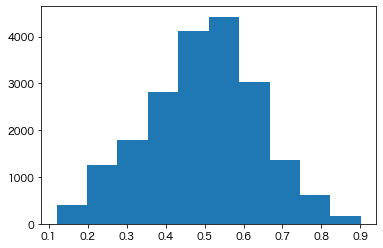

In [21]:
plt.hist(y_ensamble)

In [23]:
royality_score = (1 - y_ensamble)*100
royality_score = np.round(royality_score, decimals=1)
royality_score

array([39.2, 27.5, 37.6, ..., 54.7, 62.6, 63.7])

In [33]:
y_valid.index

Int64Index([ 3582, 60498, 53227, 21333,  3885, 51521, 84261, 10685, 59948,
            41032,
            ...
            32051, 61421, 41772, 32923, 95875, 60116,  2415, 43763, 71345,
            77687],
           dtype='int64', length=20000)

In [32]:
df.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [24]:
df_ = pd.read_csv('../data/input/Telecom_customer churn.csv')
customer_id = df_['Customer_ID']

In [25]:
customer_id_valid = customer_id.loc[y_valid.index]

In [50]:
df_output = pd.DataFrame({
    'Customer_ID': customer_id_valid,
    'churn': y_valid,
    'churn_prob_rate': y_ensamble
})
df_output.head(10)

,Customer_ID,churn,churn_prob_rate
3582,1003583,0,0.608031
60498,1060499,1,0.725341
53227,1053228,0,0.623808
21333,1021334,1,0.690209
3885,1003886,0,0.333160
51521,1051522,1,0.757664
84261,1084262,0,0.414455
10685,1010686,0,0.437222
59948,1059949,0,0.572321
41032,1041033,1,0.565355


In [26]:
df_royality = pd.DataFrame({
    'Customer_ID': customer_id_valid,
    'Royality_Score' : royality_score
})
df_royality.head(10)

,Customer_ID,Royality_Score
3582,1003583,39.2
60498,1060499,27.5
53227,1053228,37.6
21333,1021334,31.0
3885,1003886,66.7
51521,1051522,24.2
84261,1084262,58.6
10685,1010686,56.3
59948,1059949,42.8
41032,1041033,43.5


In [28]:
df_royality_churn = pd.DataFrame({
    'Customer_ID': customer_id_valid,
    'Royality_Score' : royality_score,
    'churn': y_valid
})
df_royality_churn.head(10)

,Customer_ID,Royality_Score,churn
3582,1003583,39.2,0
60498,1060499,27.5,1
53227,1053228,37.6,0
21333,1021334,31.0,1
3885,1003886,66.7,0
51521,1051522,24.2,1
84261,1084262,58.6,0
10685,1010686,56.3,0
59948,1059949,42.8,0
41032,1041033,43.5,1


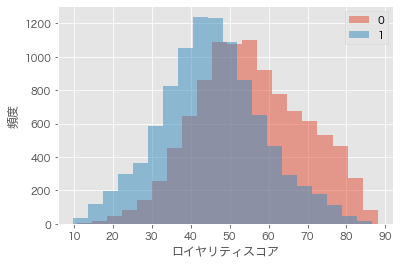

In [32]:
fig = plt.figure()
plt.style.use('ggplot')
df_royality_churn.groupby('churn')['Royality_Score'].plot.hist(bins=20, alpha=0.5, legend=True)
plt.xlabel('ロイヤリティスコア')
plt.ylabel('頻度')
fig.savefig("../images/royality_score.png")

ロイヤリティスコアに沿って、顧客を10個のグループにセグメント分けし、それぞれのセグメントの解約率を算出してみる。

In [33]:
q_ten_royality_score_df = pd.qcut(df_royality_churn['Royality_Score'], 10)
q_ten_royality_score_df

3582                  (38.5, 42.7]
60498    (9.899000000000001, 32.6]
53227                 (32.6, 38.5]
21333    (9.899000000000001, 32.6]
3885                 (62.7, 70.71]
                   ...            
60116                 (32.6, 38.5]
2415                  (42.7, 46.2]
43763                 (53.2, 57.3]
71345                 (57.3, 62.7]
77687                (62.7, 70.71]
Name: Royality_Score, Length: 20000, dtype: category
Categories (10, interval[float64]): [(9.899000000000001, 32.6] < (32.6, 38.5] < (38.5, 42.7] < (42.7, 46.2] ... (53.2, 57.3] < (57.3, 62.7] < (62.7, 70.71] < (70.71, 88.0]]

In [34]:
q_ten_royality_score_df.value_counts().sort_index()

(9.899000000000001, 32.6]    2004
(32.6, 38.5]                 2019
(38.5, 42.7]                 2031
(42.7, 46.2]                 1997
(46.2, 49.6]                 1989
(49.6, 53.2]                 1978
(53.2, 57.3]                 1997
(57.3, 62.7]                 2001
(62.7, 70.71]                1984
(70.71, 88.0]                2000
Name: Royality_Score, dtype: int64

In [35]:
df_royality_churn['q_ten_royality_score'] = q_ten_royality_score_df
df_royality_churn.head()

,Customer_ID,Royality_Score,churn,q_ten_royality_score
3582,1003583,39.2,0,"(38.5, 42.7]"
60498,1060499,27.5,1,"(9.899000000000001, 32.6]"
53227,1053228,37.6,0,"(32.6, 38.5]"
21333,1021334,31.0,1,"(9.899000000000001, 32.6]"
3885,1003886,66.7,0,"(62.7, 70.71]"


In [39]:
df_royality_churn.groupby('q_ten_royality_score')['churn'].mean()

q_ten_royality_score
(9.899000000000001, 32.6]    0.780938
(32.6, 38.5]                 0.671620
(38.5, 42.7]                 0.620384
(42.7, 46.2]                 0.586380
(46.2, 49.6]                 0.521368
(49.6, 53.2]                 0.487361
(53.2, 57.3]                 0.422634
(57.3, 62.7]                 0.377311
(62.7, 70.71]                0.285282
(70.71, 88.0]                0.189500
Name: churn, dtype: float64

In [38]:
df_royality_churn['Royality_Score'].describe()

count    20000.00000
mean        50.43892
std         14.34350
min          9.90000
25%         40.70000
50%         49.60000
75%         59.80000
max         88.00000
Name: Royality_Score, dtype: float64

In [50]:
df_royality_churn['pred'] = 0
df_royality_churn['pred2'] = 0
df_royality_churn.loc[df_royality['Royality_Score'] <= 38.5, 'pred'] = 1
df_royality_churn.loc[df_royality['Royality_Score'] <= 62.7, 'pred2'] = 1
df_royality_churn.head()

,Customer_ID,Royality_Score,churn,q_ten_royality_score,pred,pre2,pred2
3582,1003583,39.2,0,"(38.5, 42.7]",0,0,1
60498,1060499,27.5,1,"(9.899000000000001, 32.6]",1,0,1
53227,1053228,37.6,0,"(32.6, 38.5]",1,0,1
21333,1021334,31.0,1,"(9.899000000000001, 32.6]",1,0,1
3885,1003886,66.7,0,"(62.7, 70.71]",0,0,0


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_royality_churn['churn'], df_royality_churn['pred'])
print(cm)

[[9001 1102]
 [6976 2921]]


In [52]:
cm2 = confusion_matrix(df_royality_churn['churn'], df_royality_churn['pred2'])
cm2

array([[3039, 7064],
       [ 945, 8952]])

<AxesSubplot:>

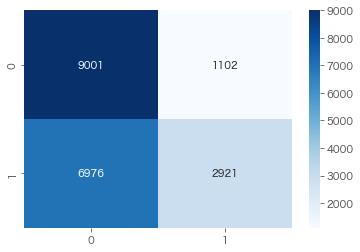

In [44]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

<AxesSubplot:>

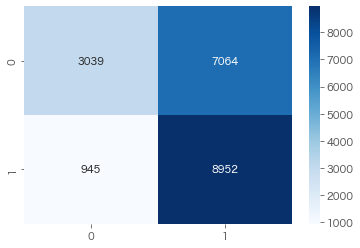

In [53]:
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d')

In [55]:
print(recall_score(df_royality_churn['churn'], df_royality_churn['pred2']))
print(precision_score(df_royality_churn['churn'], df_royality_churn['pred2']))

0.9045165201576235
0.5589410589410589


In [45]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(df_royality_churn['churn'], df_royality_churn['pred']))

0.2951399413963827


In [59]:
df['rev_Mean'].isnull().sum()

357

In [62]:
df[df['churn']==1]['rev_Mean'].isnull().sum()

245

In [64]:
df_2 = pd.read_csv('../data/input/Telecom_customer churn.csv')

In [66]:
df_2.dropna(subset=['rev_Mean'], inplace=True)
df_2

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.997500,219.25,22.500,0.2475,0.000000,0.000000,0.000000,0.00,0.00,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.492500,482.75,37.425,0.2475,22.750000,9.100000,9.100000,0.00,0.00,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.990000,10.25,16.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.000000,7.50,38.000,0.0000,0.000000,0.000000,0.000000,0.00,0.00,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.230000,570.50,71.980,0.0000,0.000000,0.000000,0.000000,0.00,0.00,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99984,85.150000,815.00,87.990,0.0000,1.000000,0.390000,0.000000,0.39,0.39,0.00,...,0.0,H,U,U,U,U,U,Y,230.0,1099985
99985,71.993333,724.00,70.000,0.0000,4.333333,1.083333,1.083333,0.00,0.91,-40.00,...,0.0,S,U,U,U,U,U,Y,882.0,1099986
99986,117.490000,384.00,29.990,0.0000,250.000000,87.500000,87.500000,0.00,0.00,0.00,...,0.0,S,U,U,U,U,U,Y,489.0,1099987
99990,29.990000,184.00,29.990,0.0000,0.000000,0.000000,0.000000,0.00,0.00,NaN,...,0.0,S,Y,U,U,U,U,Y,411.0,1099991


In [67]:
df_2['rev_Mean'].sum()

5851035.450000222

In [68]:
df_2[df_2['churn']==1]['rev_Mean'].sum()

2870795.533333365

In [69]:
df_2[df_2['churn']==1]['rev_Mean'].mean()

58.211073936641824

In [71]:
df_2['churn'].value_counts()

0    50326
1    49317
Name: churn, dtype: int64

In [47]:
print(precision_score(df_royality_churn['churn'], df_royality_churn['pred']))

0.7260750683569476


In [ ]:
df3.loc[ df3['plcd_vce_Mean'] > 0, 'vce_blk_rate'] = df3['blck_vce_Mean'] / df3['plcd_vce_Mean']

In [44]:
y_ensamble

array([0.60803082, 0.72534102, 0.62380827, ..., 0.45342865, 0.37413629,
       0.36331088])

In [45]:
df_output = pd.concat([customer_id_valid, y_valid, pd.Series(y_ensamble)])

In [47]:
df_output.head()

3582     1003583.0
60498    1060499.0
53227    1053228.0
21333    1021334.0
3885     1003886.0
dtype: float64

### クロスバリデーション

In [ ]:
random_state = 42
classifier = [RandomForestClassifier(random_state = random_state),
             lgb.LGBMClassifier(random_state = random_state)]

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

lgbm_params = {'n_estimators': [100, 500, 1000],
                'subsample': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5],
                'learning_rate': [0.1,0.01,0.02],
                "min_child_samples": [5,10,20]}

classifier_param = [rf_param_grid,                   
                   lgbm_params]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(Cclassifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

In [ ]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "RandomForestClassifier","LGBMClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")